# Improting Dependencies 

In [1]:
# Imports here
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import seaborn as sb

import json
import torch
from torch.autograd import variable

import seaborn as sb
import torch.nn.functional as F
from torch import nn
from torch import optim
from torchvision import datasets, transforms
import torchvision.models as models
import os as os
import time

from collections import OrderedDict
import glob
from PIL import Image

# Loading Data

In [2]:
data_dir = 'data_dir'
train_dir = data_dir + '/train'
valid_dir = data_dir + '/valid'
test_dir = data_dir + '/test'

In [3]:
# TODO: Define your transforms for the training, validation, and testing sets
#data_transforms = 

train_transform = transforms.Compose([transforms.Resize(255),
                                      transforms.RandomRotation(30),
                                      transforms.RandomResizedCrop(224),
                                      transforms.RandomHorizontalFlip(),
                                      #transforms.RandomVerticalFlip(),
                                      transforms.ToTensor(),
                                      transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                             std=[0.229, 0.224, 0.225])])
test_transform = transforms.Compose([transforms.Resize(255),
                                     transforms.CenterCrop(224),
                                     transforms.ToTensor(),
                                     transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                             std=[0.229, 0.224, 0.225])])

valid_transform = transforms.Compose([transforms.Resize(255),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                             std=[0.229, 0.224, 0.225])])



# TODO: Load the datasets with ImageFolder
#image_datasets = 
trainset = datasets.ImageFolder(train_dir, transform = train_transform)
validset = datasets.ImageFolder(valid_dir, transform = valid_transform)
testset = datasets.ImageFolder(test_dir, transform = test_transform)

# TODO: Using the image datasets and the trainforms, define the dataloaders
#dataloaders = 
trainloader = torch.utils.data.DataLoader(trainset, batch_size = 64, shuffle = True)
validloader = torch.utils.data.DataLoader(validset, batch_size = 32, shuffle = True)
testloader = torch.utils.data.DataLoader(testset, batch_size = 32, shuffle = True)

# Defineing and Training Model

In [4]:
model = models.densenet121(pretrained = True)
model

C:\Users\VAibhAv GupTA\Anaconda3\lib\site-packages\torchvision\models\densenet.py:212: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  nn.init.kaiming_normal(m.weight.data)
C:\Users\VAibhAv GupTA\Anaconda3\lib\site-packages\torchvision\models\densenet.py:212: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  nn.init.kaiming_normal(m.weight.data)
C:\Users\VAibhAv GupTA\Anaconda3\lib\site-packages\torchvision\models\densenet.py:212: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  nn.init.kaiming_normal(m.weight.data)
C:\Users\VAibhAv GupTA\Anaconda3\lib\site-packages\torchvision\models\densenet.py:212: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  nn.init.kaiming_normal(m.weight.data)
C:\Users\VAibhAv GupTA\Anaconda3\lib\site-packages\torchvision\models\densenet.py:212: UserWarning: nn.init.kaiming_normal is no

C:\Users\VAibhAv GupTA\Anaconda3\lib\site-packages\torchvision\models\densenet.py:212: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  nn.init.kaiming_normal(m.weight.data)
C:\Users\VAibhAv GupTA\Anaconda3\lib\site-packages\torchvision\models\densenet.py:212: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  nn.init.kaiming_normal(m.weight.data)
C:\Users\VAibhAv GupTA\Anaconda3\lib\site-packages\torchvision\models\densenet.py:212: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  nn.init.kaiming_normal(m.weight.data)
C:\Users\VAibhAv GupTA\Anaconda3\lib\site-packages\torchvision\models\densenet.py:212: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  nn.init.kaiming_normal(m.weight.data)
C:\Users\VAibhAv GupTA\Anaconda3\lib\site-packages\torchvision\models\densenet.py:212: UserWarning: nn.init.kaiming_normal is no

C:\Users\VAibhAv GupTA\Anaconda3\lib\site-packages\torchvision\models\densenet.py:212: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  nn.init.kaiming_normal(m.weight.data)
C:\Users\VAibhAv GupTA\Anaconda3\lib\site-packages\torchvision\models\densenet.py:212: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  nn.init.kaiming_normal(m.weight.data)
C:\Users\VAibhAv GupTA\Anaconda3\lib\site-packages\torchvision\models\densenet.py:212: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  nn.init.kaiming_normal(m.weight.data)
C:\Users\VAibhAv GupTA\Anaconda3\lib\site-packages\torchvision\models\densenet.py:212: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  nn.init.kaiming_normal(m.weight.data)
C:\Users\VAibhAv GupTA\Anaconda3\lib\site-packages\torchvision\models\densenet.py:212: UserWarning: nn.init.kaiming_normal is no

C:\Users\VAibhAv GupTA\Anaconda3\lib\site-packages\torchvision\models\densenet.py:212: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  nn.init.kaiming_normal(m.weight.data)
C:\Users\VAibhAv GupTA\Anaconda3\lib\site-packages\torchvision\models\densenet.py:212: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  nn.init.kaiming_normal(m.weight.data)
C:\Users\VAibhAv GupTA\Anaconda3\lib\site-packages\torchvision\models\densenet.py:212: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  nn.init.kaiming_normal(m.weight.data)
C:\Users\VAibhAv GupTA\Anaconda3\lib\site-packages\torchvision\models\densenet.py:212: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  nn.init.kaiming_normal(m.weight.data)
C:\Users\VAibhAv GupTA\Anaconda3\lib\site-packages\torchvision\models\densenet.py:212: UserWarning: nn.init.kaiming_normal is no

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplac

In [5]:
for param in model.parameters():
    param.requires_grad = False
    
classifier = nn.Sequential(OrderedDict([
                         ('fc1', nn.Linear(1024, 512)),
                         ('relu1', nn.ReLU()),
                         ('fc2', nn.Linear(512, 2)) ,
                         ('output', nn.LogSoftmax(dim = 1))]))

model.classifier = classifier
print(classifier)

Sequential(
  (fc1): Linear(in_features=1024, out_features=512, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=512, out_features=2, bias=True)
  (output): LogSoftmax()
)


In [6]:
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.classifier.parameters(), lr=0.001)

In [7]:
# Implement a function for the validation pass
def validation(model, validloader, criterion):
    test_loss = 0
    accuracy = 0
    for images, labels in validloader:

        images, labels = images.to('cuda'), labels.to('cuda')
        output = model.forward(images)
        test_loss += criterion(output, labels).item()

        ps = torch.exp(output)
        equality = (labels.data == ps.max(dim=1)[1])
        accuracy += equality.type(torch.FloatTensor).mean()
    
    return test_loss, accuracy

In [8]:
def do_deep_learning(model, trainloader, epochs, print_every, criterion, optimizer, device='cpu'):
    epochs = epochs
    print_every = print_every
    steps = 0

    # change to cuda
    model.cuda()

    for e in range(epochs):
        running_loss = 0
        for ii, (inputs, labels) in enumerate(trainloader):
            steps += 1

            inputs, labels = inputs.to('cuda'), labels.to('cuda')

            optimizer.zero_grad()

            # Forward and backward passes
            outputs = model.forward(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

            if steps % print_every == 0:
                model.eval()
                with torch.no_grad():
                    test_loss, accuracy = validation(model, validloader, criterion)
            
                print("Epoch: {}/{}.. ".format(e+1, epochs),
                  "Training Loss: {:.3f}.. ".format(running_loss/print_every),
                  "Test Loss: {:.3f}.. ".format(test_loss/len(validloader)),
                  "Test Accuracy: {:.3f}".format(accuracy/len(validloader)))
            
                running_loss = 0
    
    
do_deep_learning(model, trainloader, 2, 42, criterion, optimizer, 'gpu')

Epoch: 1/2..  Training Loss: 0.298..  Test Loss: 0.056..  Test Accuracy: 0.982
Epoch: 1/2..  Training Loss: 0.145..  Test Loss: 0.044..  Test Accuracy: 0.982
Epoch: 1/2..  Training Loss: 0.131..  Test Loss: 0.047..  Test Accuracy: 0.986
Epoch: 1/2..  Training Loss: 0.150..  Test Loss: 0.044..  Test Accuracy: 0.987
Epoch: 1/2..  Training Loss: 0.143..  Test Loss: 0.039..  Test Accuracy: 0.987
Epoch: 1/2..  Training Loss: 0.136..  Test Loss: 0.041..  Test Accuracy: 0.986
Epoch: 1/2..  Training Loss: 0.127..  Test Loss: 0.040..  Test Accuracy: 0.985
Epoch: 1/2..  Training Loss: 0.147..  Test Loss: 0.038..  Test Accuracy: 0.989
Epoch: 2/2..  Training Loss: 0.057..  Test Loss: 0.038..  Test Accuracy: 0.987
Epoch: 2/2..  Training Loss: 0.134..  Test Loss: 0.036..  Test Accuracy: 0.989
Epoch: 2/2..  Training Loss: 0.140..  Test Loss: 0.070..  Test Accuracy: 0.971
Epoch: 2/2..  Training Loss: 0.120..  Test Loss: 0.032..  Test Accuracy: 0.989
Epoch: 2/2..  Training Loss: 0.128..  Test Loss: 0.0

## Testing network

In [46]:
# TODO: Do validation on the test set
def check_accuracy_on_test(testloader):    
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            images, labels = images.to('cuda'), labels.to('cuda')
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the test images: %.3f %%' % (100 * correct / total))

check_accuracy_on_test(testloader)

Accuracy of the network on the test images: 97.718 %


# Predicting an Input Image

In [47]:
def process_image(image):
    ''' Scaling, croping, and normalizeing a PIL image for a PyTorch model and
        returning an Numpy array
    '''
    img = Image.open(image)
    width, height = img.size
    if width < height:
        img.thumbnail((256,height))
    else:
        img.thumbnail((width,256))
    imgwidth = img.size[0]
    imgheight = img.size[1]
    halfimgwidth = imgwidth//2
    halfimgheight = imgheight//2
   
    crop_square = (imgwidth//2 - 112, 
                   imgheight//2 - 112, 
                   imgwidth//2 + 112, 
                   imgheight//2 + 112)

    img = img.crop(crop_square)
    to_tensor = transforms.ToTensor()
    img = to_tensor(img)
    normalize = transforms.Normalize([0.485, 0.456, 0.406], 
                         [0.229, 0.224, 0.225])
    img = normalize(img)
    img = np.array(img)
    img = np.ndarray.transpose(img)
    return img
image_path = ('data_dir/test/test1/7536.jpg')

#Run function
img = process_image(image_path)

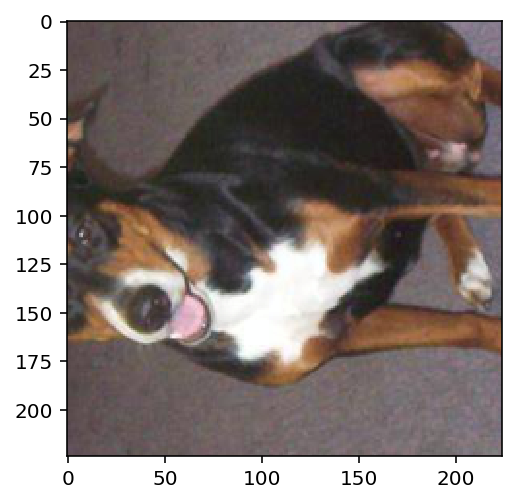

In [48]:
model.cuda()
def imshow(image, ax=None, title=None):
    if ax is None:
        fig, ax = plt.subplots()
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    image = std * image + mean
    image = np.clip(image, 0, 1)
    
    ax.imshow(image)
    
    return ax
imshow(img)

# Final Prediction

In [49]:
model.class_to_idx = trainset.class_to_idx
cat = model.class_to_idx
def predict(image_path, model, topk=2):
    ''' Predict the class (or classes) of an image using a trained deep learning model.
    '''
    image = process_image(image_path)
    image = torch.from_numpy(image)
    image = image.float()
    image = np.transpose(image, (2, 1, 0))
    with torch.no_grad():
        model.eval()
        image.unsqueeze_(0)
        image = image.to('cuda')
        output = model.forward(image)
    ps = torch.exp(output)
    check = torch.topk(ps, topk)
    probs = check[0].cpu()
    classes = check[1].cpu()
    c = classes.numpy()
    c = list(c)
    l1 = []
    for i in range(2):
        z = c[0][i]
        for a in cat.keys():
            if cat[a] == z:
                r = a
                l1.append(r)
    return probs, l1
probes, classes = predict(image_path, model, topk = 2)
p = probes.numpy()
probes = np.reshape(p, (np.product(p.shape),))

print('classes = ', classes)
    
print('probes = ', probes)


classes =  ['dog', 'cat']
probes =  [9.9988031e-01 1.1963844e-04]


[('dog', 0.9998803), ('cat', 0.00011963844)]


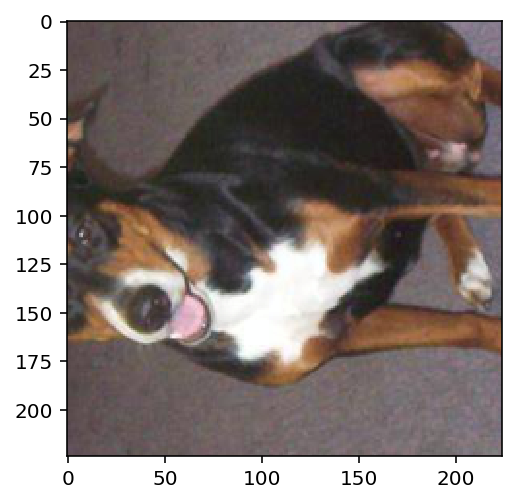

In [53]:
imshow(img)   
names = []
result = list(zip(classes,probes))
print(result)    

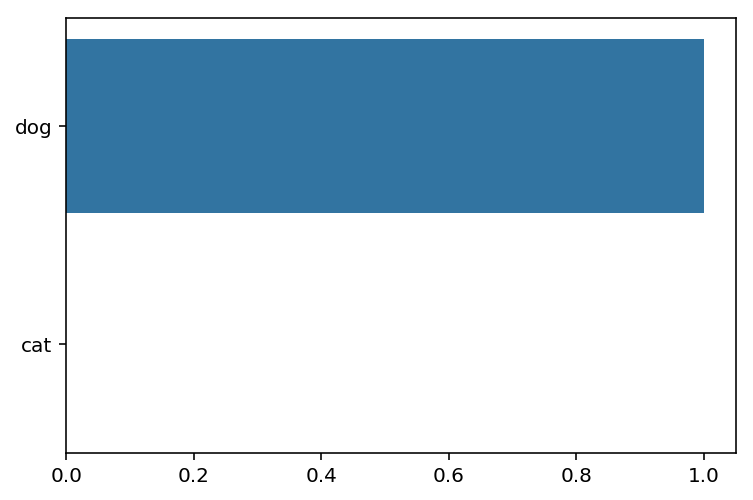

In [55]:
base_color = sb.color_palette()[0]
sb.barplot(y = classes, x = probes, color = base_color)